# Project: Investigate no show appointments in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Throughout this report, We will be extracting insights that will help us take decisions to increase health care awareness and to step on root causes of why patient skip their appointment in addition to address some insights that will solve issues related to adherence, This data was collected from Brazil on May 2016. In this report, we will answer the below questions and see where improvement can occur.
>
> **Q1** : Does where the patient comes from affects their adherence to the appointment?
>
> **Q2** : Who is more likely to adhere to the appointment Children, Youth, Adults, Seniors?
>
> **Q3** : Which gender cares most about their health status?
>
> **Q4** : In which dates more patient adhere to the scheduled appointment?
>

In [24]:
#importing relevant libraries and the dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df  = pd.read_csv('Appointments.csv')

In [44]:
#creating a function to name the plot , x label and y label

def plot_name(title , xlabel , ylabel):
    plt.title("Showed patient by{}".format(title));
    plt.ylabel(ylabel);
    plt.xlabel(xlabel);


In [26]:
#investigate charectricstics of columns 
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [27]:
#quick check to see the inside columns to determine what to wrangle 

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> After a quick view of the data we found out that there are no missing values so here we will address the steps needed before analysing the data.
>
> 1.Drop unwanted columns in order to increase readability of the data.
>
> 2.Change type for appointment day to be date type.
>
> 3.Lower case the column name and add underscore between separated words. 
>
> 4.Add categorized age column. 
>

### Data Cleaning

In [28]:
#drop unwanted columns

columns_to_drop = ["AppointmentID" , "ScheduledDay", "Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","PatientId"]

df.drop(columns = columns_to_drop , axis = 1 , inplace  = True  );

In [29]:
#lower case columns names and add underscores 

df.columns = df.columns.str.lower();
df.rename(columns = {"patientid":"patient_id","appointmentday":"appointment_day","no-show":"no_show"}, inplace = True);

In [30]:
df.head()

,gender,appointment_day,age,neighbourhood,no_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No


In [31]:
#Change type for appointment day to be date type

df['appointment_day'] = df['appointment_day'].str.split('T').str[0]


In [32]:
df['appointment_day']= pd.to_datetime(df['appointment_day'])

In [33]:
df.head()

,gender,appointment_day,age,neighbourhood,no_show
0,F,2016-04-29,62,JARDIM DA PENHA,No
1,M,2016-04-29,56,JARDIM DA PENHA,No
2,F,2016-04-29,62,MATA DA PRAIA,No
3,F,2016-04-29,8,PONTAL DE CAMBURI,No
4,F,2016-04-29,56,JARDIM DA PENHA,No


In [34]:
#categorized age
#Children (0-14 years) , Youth (15-24 years) , Adults (25-64 years), Seniors (65 years and over)

labels = ["Children","Youth","Adults","Seniors"];
bins = [0, 14, 24, 64 , 130 ];
df['age_categorey'] = pd.cut(df['age'], bins, include_lowest=True,labels = labels)
df.head()

,gender,appointment_day,age,neighbourhood,no_show,age_categorey
0,F,2016-04-29,62,JARDIM DA PENHA,No,Adults
1,M,2016-04-29,56,JARDIM DA PENHA,No,Adults
2,F,2016-04-29,62,MATA DA PRAIA,No,Adults
3,F,2016-04-29,8,PONTAL DE CAMBURI,No,Children
4,F,2016-04-29,56,JARDIM DA PENHA,No,Adults


<a id='eda'></a>
## Exploratory Data Analysis

.

### Research Question 1 Does where the patient comes from affects their adherence to the appointment?

In [51]:
#here we used the normalize option since the data is not equal in each neighbourhood
#grouping the no show by neughbourhood

hood = df.groupby("no_show")['neighbourhood'].value_counts(normalize=True , sort = True, ascending=False)
hood

no_show  neighbourhood              
No       JARDIM CAMBURI                 0.070878
         MARIA ORTIZ                    0.051991
         RESISTÊNCIA                    0.039962
         JARDIM DA PENHA                0.036799
         SANTA MARTHA                   0.029873
                                          ...   
Yes      PONTAL DE CAMBURI              0.000538
         ILHA DO BOI                    0.000134
         ILHA DO FRADE                  0.000090
         ILHAS OCEÂNICAS DE TRINDADE    0.000090
         AEROPORTO                      0.000045
Name: neighbourhood, Length: 160, dtype: float64

In [57]:
#grouping by neighbourhood and age categorey
#here we will sort each neighbourhood by age categorey which might help us see patients age catergory to focus on increase
#awarness between patients

df.groupby("neighbourhood")['age_categorey'].value_counts( sort = True, ascending=False)



neighbourhood  age_categorey
AEROPORTO      Adults              8
ANDORINHAS     Adults           1220
               Children          462
               Youth             310
               Seniors           270
                                ... 
UNIVERSITÁRIO  Youth               9
VILA RUBIM     Adults            494
               Seniors           170
               Children          103
               Youth              84
Name: age_categorey, Length: 312, dtype: int64

### Research Question 2  Who is more likely to adhere to the appointment Children, Youth, Adults, Seniors?

In [58]:
#grouping by age categorey 
df.groupby("no_show")['age_categorey'].value_counts()

no_show  age_categorey
No       Adults           47237
         Children         18331
         Seniors          12169
         Youth            10470
Yes      Adults           11620
         Children          4926
         Youth             3540
         Seniors           2233
Name: age_categorey, dtype: int64

In [59]:
#check number of appointments by age categorey and appointment day

df.groupby("age_categorey")['appointment_day'].value_counts()

age_categorey  appointment_day
Children       2016-05-16         1073
               2016-06-06         1061
               2016-05-09          975
               2016-05-11          972
               2016-06-07          968
                                  ... 
Seniors        2016-05-25          512
               2016-05-06          498
               2016-05-20          458
               2016-04-29          395
               2016-05-14           10
Name: appointment_day, Length: 107, dtype: int64

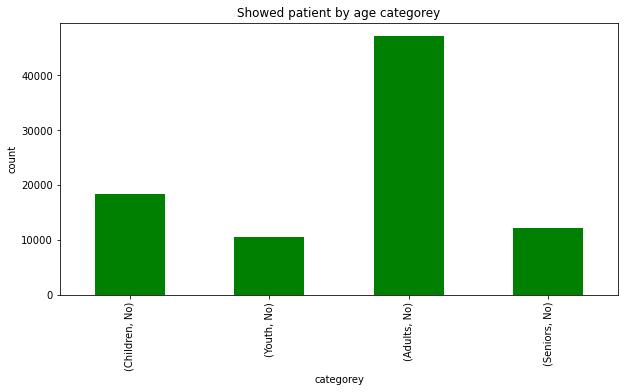

In [60]:
showed_age = df[df['no_show'] == "No"].groupby("age_categorey")['no_show'].value_counts()
showed_age.plot(kind = "bar" , color = "green",figsize = (10,5));
plot_name(" age categorey","categorey","count")

Here we see that adults are more likely to come to the appointments while youth seems to skip thier appointment 

### Research Question 3  Which gender cares most about their health status?

In [40]:
df.groupby("no_show")['gender'].value_counts()

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: gender, dtype: int64

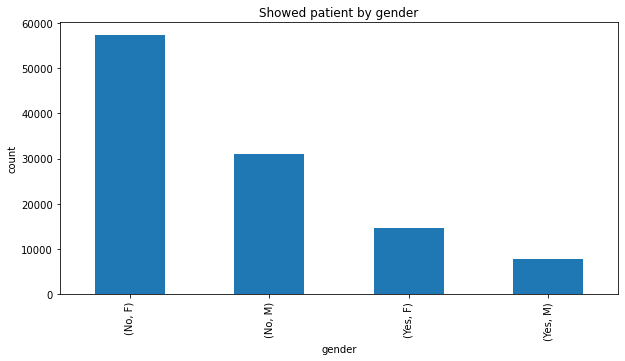

In [61]:
df.groupby("no_show")['gender'].value_counts().plot(kind = 'bar',figsize = (10,5));
plt.title("Showed patient by gender ");
plot_name(" gender","gender","count")

From the collected data females are more likely to show for the appointment 

### Research Question 4  In which dates more patient adhere to the scheduled appointment?


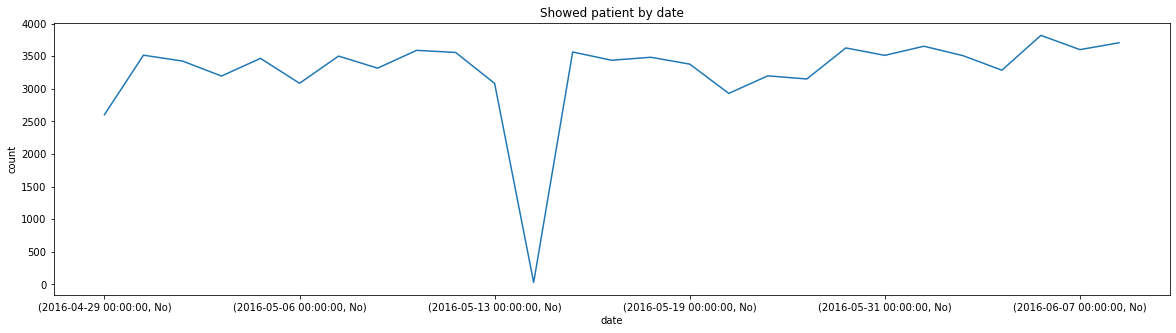

In [62]:
appointment = df[df['no_show'] == "No"].groupby("appointment_day")['no_show'].value_counts().plot(kind = 'line',figsize=(20, 5))
plot_name(" date","date","count")


for each day of the month the number of patient who shows up mostly equal except for the middle interval of the month 

In [65]:
df['weekday'] = df['appointment_day'].dt.strftime('%a')
df['no_show_numerical'] = df['no_show'].replace({'No':1, 'Yes':0})
df.groupby('weekday').mean()['no_show_numerical']

weekday
Fri    0.787739
Mon    0.793529
Sat    0.769231
Thu    0.806459
Tue    0.799064
Wed    0.803108
Name: no_show_numerical, dtype: float64

Thursday and wednesday are the busiest days thorugh the weekdays

<a id='conclusions'></a>
## Conclusions

>As we can see from the first question that if the patient came from one of theses neighbourhoods are likely to come to the >appointment, and there will be few patients who will skip it.
>
>**[JARDIM CAMBURI , MARIA ORTIZ, RESISTÊNCIA , JARDIM DA PENHA ]**
>
>On the other side the patients who comes from theses neighbourhoods are likely to skip their appointments.
>
>**[ILHA DO BOI, ILHA DO FRADE, ILHAS OCEÂNICAS DE TRINDADE, AEROPORTO]**
>
>From the second research question we see that adult from 25 - 64 cares more about their health.
>
>Also seniors seem to don't care about their health which indicates that we should take care of educating the seniors about >their health and the importance of showing to the appointment.
>
>Question three indicates that females are more aware of their health which also tells us to shift slightly our attention to >male patients for increasing health awareness. 
>
>Looking at question four from the plot we see that around the last and first few days of the month higher patient shows to the >appointment on the other side in the middle of the month we see a huge drop in the showed patients this insight is very useful >for scheduling doctors' numbers in the clinics.
> As we know the collected data is only for one month so the analysis might be incorrect 
>
> In addition we couldnt check the correlation of no show versus the date since we have small interval of data 
> 

<a id='references'></a>
## References

> https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
>
>https://www.kite.com/python/answers/
>
>https://stackoverflow.com/questions/
>
>https://www.statcan.gc.ca/eng/concepts/definitions/age2
>
>https://classroom.udacity.com/nanodegrees/nd002-ent/parts/7c3355c3-ad81-452f-983a-bd432d2959d1/modules/3ed74069-10eb-416d-860d-ef6d59a20c4b/lessons/e479a678-4d26-4d44-bfdd-38afb8e3c63a/concepts/d49caec2-028e-44fd-8392-5246a3b2cf11
>
>https://www.w3resource.com/pandas/series/
>
>https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/